In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ProjectData_ICESept1.csv to ProjectData_ICESept1.csv


In [ ]:
# Read in data
import io
df = pd.read_csv(io.BytesIO(uploaded['ProjectData_ICESept1.csv']))
df

,INDEX_NAME,AS_OF_DATE,CUSIP,ISIN_NUMBER,DESCRIPTION,CASH_VALUE,TICKER,PAR_WTD_COUPON,CURRENT_COUPON,MATURITY_DATE,...,SPRD_TO_WORST_3_MTH_CHGE,SPRD_TO_WORST_12_MTH_CHGE,SPRD_TO_WORST_MTD_CHGE,SPRD_TO_WORST_QTD_CHGE,SPRD_TO_WORST_YTD_CHGE,LIBOROAS,MARKET_CONVENTION_PRICE,FACE_VALUE_LOC,FULL_MARKET_VALUE_LOC,FACE_VALUE_PREVMEND_LOC
0,H0A0,9/1/2023,00081TAK,US00081TAK43,ACCO Brands Corporation,0,ACCO,4.250,4.250,3/15/2029,...,-76.0,-112.0,-3,-47.0,-70.0,347,85.309,575.0,501.8630,575.0
1,H0A0,9/1/2023,00109LAA,US00109LAA17,ADT Security Corp.,0,ADT,4.125,4.125,8/1/2029,...,-46.0,-115.0,0,-33.0,-54.0,278,87.000,1000.0,873.5519,1000.0
2,H0A0,9/1/2023,00119LAA,US00119LAA98,AG Issuer LLC,0,ADVGRO,6.250,6.250,3/1/2028,...,-143.0,-173.0,-3,-27.0,-122.0,275,95.720,500.0,478.6850,500.0
3,H0A0,9/1/2023,00150LAB,US00150LAB71,AHP Health Partners Inc.,0,ARDT,5.750,5.750,7/15/2029,...,-38.0,-219.0,-1,-1.0,-185.0,491,85.498,300.0,258.7468,300.0
4,H0A0,9/1/2023,00164VAE,US00164VAE39,AMC Networks Inc,0,AMCX,4.750,4.750,8/1/2025,...,-293.0,-76.0,0,-338.0,-877.0,355,93.697,800.0,752.8459,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,H0A0,9/1/2023,98954UAB,US98954UAB98,Ziggo Bond Company B.V.,0,ZIGGO,6.000,6.000,1/15/2027,...,-82.0,-148.0,-4,-44.0,-8.0,396,92.988,625.0,586.0722,625.0
1861,H0A0,9/1/2023,98955DAA,US98955DAA81,Ziggo B.V.,0,ZIGGO,4.875,4.875,1/15/2030,...,-60.0,-56.0,-8,-45.0,-19.0,409,84.062,991.0,851.4412,991.0
1862,H0A0,9/1/2023,98980BAA,US98980BAA17,ZipRecruiter Inc,0,ZIP,5.000,5.000,1/15/2030,...,-44.0,-66.0,-3,10.0,-38.0,430,83.755,550.0,464.2428,550.0
1863,H0A0,9/1/2023,98981BAA,US98981BAA08,Zoominfo Technologies Llc /Zoominfo Financial ...,0,ZMINFO,3.875,3.875,2/1/2029,...,-1.0,-28.0,-3,13.0,-24.0,322,84.909,650.0,554.0805,650.0


## **Part 1: Data Cleaning and Preprocessing**

WAM                          100.000000
MUNI_STATE                   100.000000
WAC                          100.000000
WALA                         100.000000
CPR                          100.000000
OAS_12_MO_CHANGE               9.812332
SPRD_TO_WORST_12_MTH_CHGE      9.812332
ASSETSWP_12_MTH_CHGE           9.812332
TRR_12_MONTH_LOC               9.812332
EXCESS_RTN_12_MONTH            9.812332
TRR_YTD_LOC                    8.150134
SPRD_TO_WORST_YTD_CHGE         8.150134
OAS_YTD_CHANGE                 8.150134
EXCESS_RTN_YTD                 8.150134
ASSETSWP_YTD_CHGE              8.150134
TRR_6_MONTH_LOC                6.166220
EXCESS_RTN_6_MONTH             6.166220
YIELD_TO_NEXT_CALL             5.361930
dtype: float64


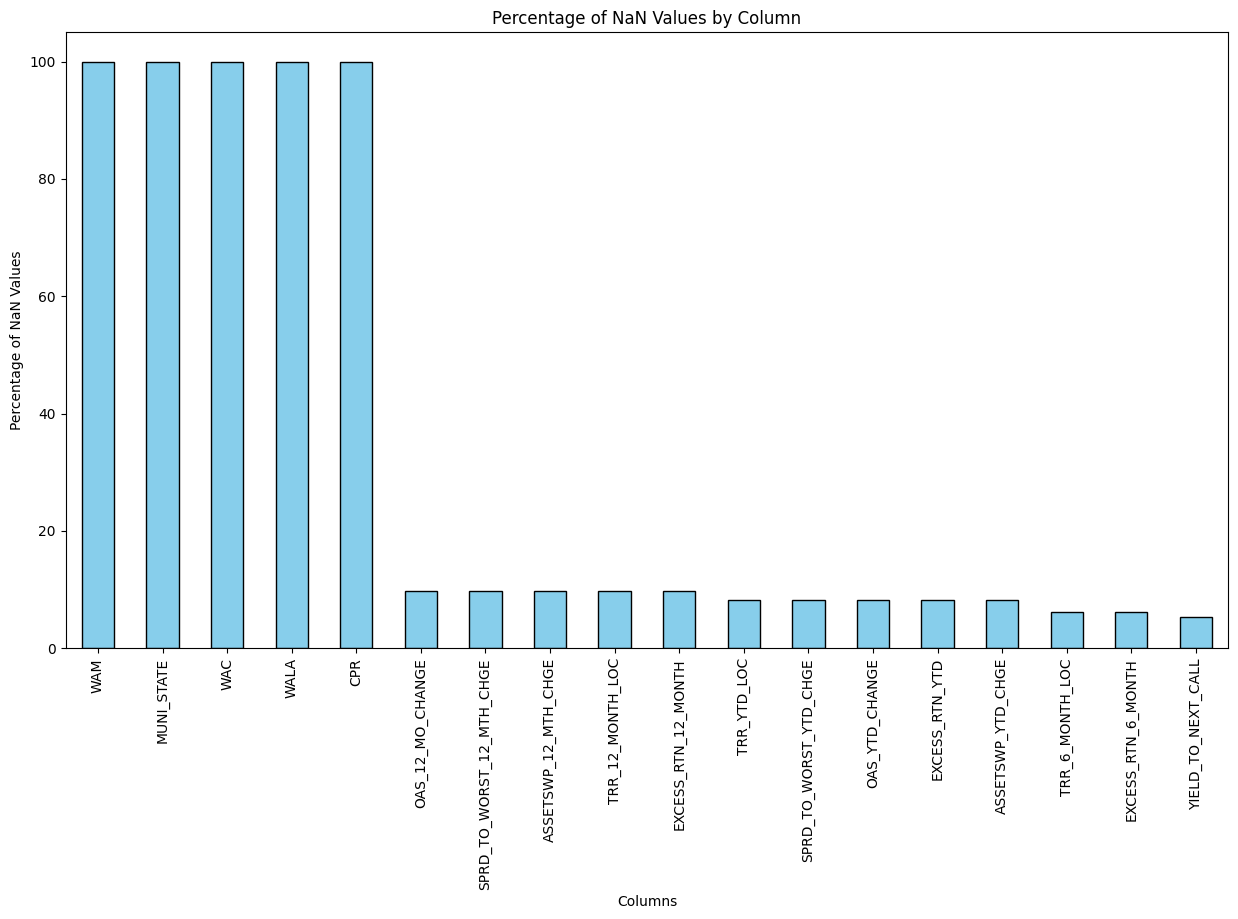

In [ ]:
# Determine percentage of missing values in each column
nan_percentage = df.isnull().mean() * 100
nan_percentage.sort_values(ascending=False, inplace=True)
nan_percentage = nan_percentage[nan_percentage > 5]
print(nan_percentage)
nan_percentage.plot(kind='bar', figsize=(15, 8), color='skyblue', edgecolor='black')
plt.title('Percentage of NaN Values by Column')
plt.xlabel('Columns')
#plt.xticks(rotation=45)
plt.ylabel('Percentage of NaN Values')

# Drop columns with 100% NaN values
columns_drop = ["WAM", "MUNI_STATE", "WAC", "WALA", "CPR"]
df.drop(columns=columns_drop, inplace=True)

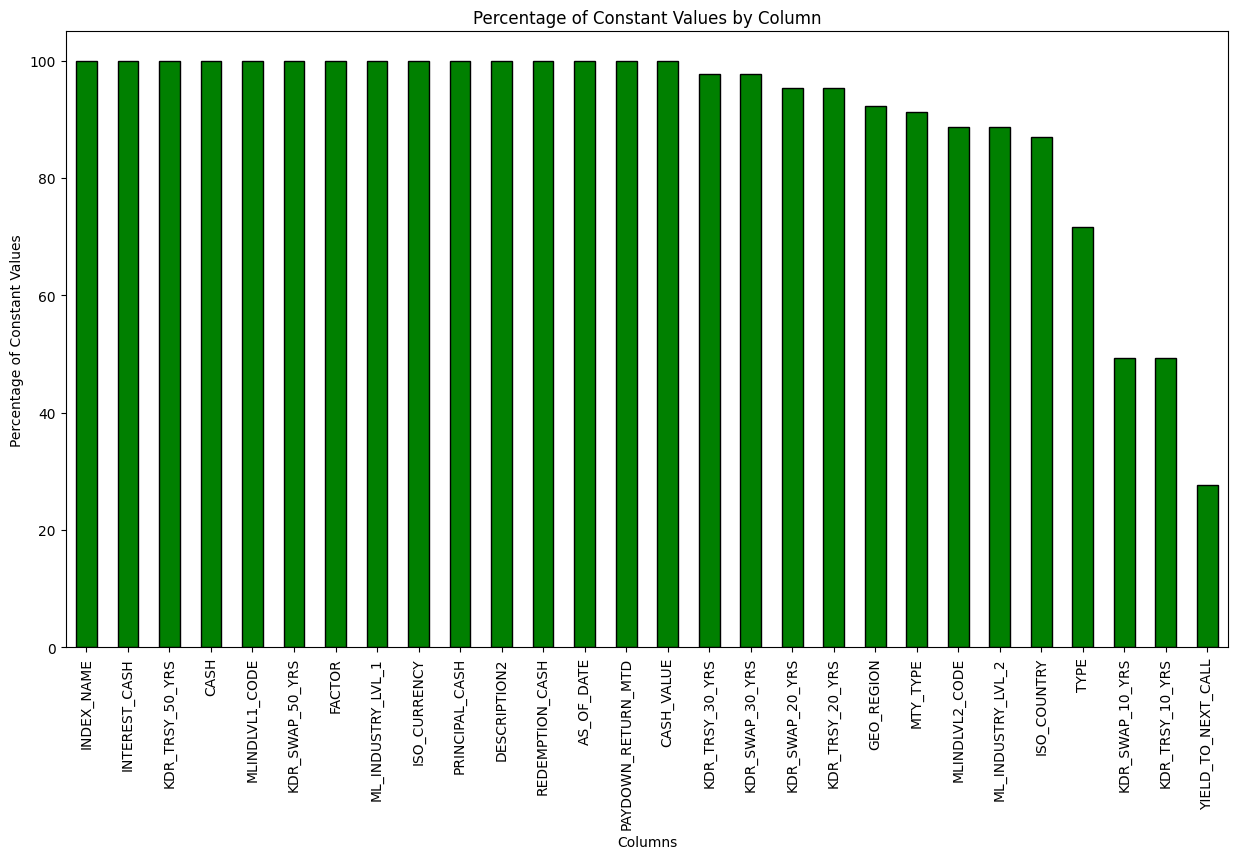

In [ ]:
# Determine percentage of rows with same value for each column (shows whether column provides information)
same_value_percentage = df.apply(lambda column: column.value_counts(normalize=True).max() * 100)
same_value_percentage.sort_values(ascending=False, inplace=True)
same_value_percentage = same_value_percentage[same_value_percentage > 25]
same_value_percentage.plot(kind='bar', figsize=(15, 8), color='green', edgecolor='black')
plt.title('Percentage of Constant Values by Column')
plt.xlabel('Columns')
#plt.xticks(rotation=45)
plt.ylabel('Percentage of Constant Values')

# Drop Columns with 100% same value
const_cols = same_value_percentage[same_value_percentage == 100]
df.drop(columns = list(const_cols.index), inplace = True)
df.drop(columns = ["CUSIP", "ISIN_NUMBER", "DESCRIPTION", "ML_INDUSTRY_LVL_2", "ML_INDUSTRY_LVL_3",
                  "ML_INDUSTRY_LVL_4"], inplace=True)

In [ ]:
# Deal with missing data

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

# For categorical columns, fill na values with most occuring value in column
for column in categorical_features:
    most_occuring_value = df[column].mode()[0]
    df[column].fillna(most_occuring_value, inplace=True)

# For numerical columns, fill na values with mean of column
for column in numerical_features:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

In [ ]:
# Check for constant columns after interpolating and drop
same_value_percentage = df.apply(lambda column: column.value_counts(normalize=True).max() * 100)
const_cols = same_value_percentage[same_value_percentage == 100]
df.drop(columns = list(const_cols.index), inplace = True)

# Check that no na values in data
nan_percentage = df.isnull().mean() * 100
nan_percentage.sort_values(ascending=False, inplace=True)
print(nan_percentage)

TICKER                     0.0
PAR_WTD_COUPON             0.0
OAS_12_MO_CHANGE           0.0
OAS_3_MO_CHANGE            0.0
OAS_1_MO_CHANGE            0.0
                          ... 
KDR_TRSY_20_YRS            0.0
KDR_TRSY_10_YRS            0.0
KDR_TRSY_5_YRS             0.0
KDR_TRSY_2_YRS             0.0
FACE_VALUE_PREVMEND_LOC    0.0
Length: 112, dtype: float64


In [ ]:
# Check pairwise correlations for numerical columns
numerical_df = df[numerical_features]
num_df_corr = numerical_df.corr()

# Check for multicollinearity
threshold = 0.9  # You can set your own threshold
multicollinear_pairs = []
corr_val = []

for i in range(len(num_df_corr.columns)):
    for j in range(i+1, len(num_df_corr.columns)):
        if abs(num_df_corr.iloc[i, j]) > threshold:
            multicollinear_pairs.append((num_df_corr.columns[i], num_df_corr.columns[j]))
            corr_val.append(num_df_corr.iloc[i,j])

# Dataframe of pairwise correlations among columns
multi_df = pd.DataFrame(multicollinear_pairs, columns=["Feature1", "Feature2"])
multi_df["Correlation"] = corr_val
multi_df.sort_values(by="Correlation", ascending=False, inplace=True)
multi_df

,Feature1,Feature2,Correlation
0,PAR_WTD_COUPON,CURRENT_COUPON,1.000000
193,FACE_VALUE_LOC,FACE_VALUE_PREVMEND_LOC,1.000000
141,OAS_1_DAY_CHANGE,OAS_MTD_CHANGE,1.000000
191,SPRD_TO_WORST_1_DAY_CHG,SPRD_TO_WORST_MTD_CHGE,1.000000
69,TRR_1_DAY_LOC,TRR_MTD_LOC,1.000000
...,...,...,...
2,MATURITY_WAL,EFF_DUR,0.908030
56,MODIFIED_DUR,SPREAD_DURATION,0.903976
29,SEMI_MOD_DURATION,SPREAD_DURATION,0.903966
76,TRR_1_MONTH_LOC,OAS_1_MO_CHANGE,-0.901407


In [ ]:
feature1_list, feature2_list = list(multi_df["Feature1"]), list(multi_df["Feature2"])
cols_drop = []
for i in range(len(feature1_list)):
    if feature1_list[i] not in cols_drop:
        cols_drop.append(feature1_list[i])
print(cols_drop)

['PAR_WTD_COUPON', 'FACE_VALUE_LOC', 'OAS_1_DAY_CHANGE', 'SPRD_TO_WORST_1_DAY_CHG', 'TRR_1_DAY_LOC', 'PRICE', 'ASSETSWP_1_DAY_CHGE', 'MKT_INDEX_WGHT', 'PAR_INDEX_WGHT', 'EXCESS_RTN_1_DAY', 'YLD_TO_MATURITY', 'SEMI_YLD_TO_WORST', 'SEMI_MOD_DUR_TO_WORST', 'SEMI_CONVEXITY_TO_WORST', 'SEMI_MOD_DURATION', 'SEMI_CONVEXITY', 'ACCRUED_INTEREST', 'PREVMEND_MKT_INDEX_WGHT', 'OAS', 'EFF_DUR', 'KDR_TRSY_5_YRS', 'KDR_TRSY_20_YRS', 'KDR_TRSY_2_YRS', 'KDR_TRSY_10_YRS', 'PREVMEND_PRICE', 'EFFECTIVE_YIELD', 'YLD_TO_WORST', 'PREVMEND_OAS', 'KDR_TRSY_6_MOS', 'ASSET_SWAP', 'PREVMEND_YLD_TO_WORST', 'TRR_MTD_LOC', 'OAS_12_MO_CHANGE', 'PREVMEND_EFF_YIELD', 'SPREAD_TO_WORST', 'MOD_DUR_TO_WORST', 'EXCESS_RTN_MTD', 'BOND_EQUIV_YTM', 'TRR_YTD_LOC', 'KDR_TRSY_30_YRS', 'TRR_6_MONTH_LOC', 'MODIFIED_DUR', 'OAS_1_MO_CHANGE', 'TRR_1_WEEK_LOC', 'OAS_3_MO_CHANGE', 'OAS_QTD_CHANGE', 'TRR_1_MONTH_LOC', 'CONVEXITY_TO_WORST', 'TRR_12_MONTH_LOC', 'TRR_QTD_LOC', 'TRR_3_MONTH_LOC', 'FULL_MARKET_VALUE_LOC', 'PREVMEND_MOD_DUR_TO

In [ ]:
# Drop feature 2 from pairs with correlation of above 0.9
df.drop(columns = cols_drop, inplace=True)
df

,TICKER,CURRENT_COUPON,MATURITY_DATE,YRS_TO_WORST,RATING,ISO_COUNTRY,MLINDLVL2_CODE,MLINDLVL3_CODE,MLINDLVL4_CODE,MACAULAY_DUR,...,SPRD_TO_WORST_1_WK_CHGE,SPRD_TO_WORST_1_MTH_CHGE,SPRD_TO_WORST_3_MTH_CHGE,SPRD_TO_WORST_12_MTH_CHGE,SPRD_TO_WORST_MTD_CHGE,SPRD_TO_WORST_QTD_CHGE,SPRD_TO_WORST_YTD_CHGE,LIBOROAS,MARKET_CONVENTION_PRICE,FACE_VALUE_PREVMEND_LOC
0,ACCO,4.250,3/15/2029,5.536,BB3,US,INDU,Cons,ConP,4.824,...,-49.0,4.0,-76.0,-112.0,-3,-47.0,-70.0,347,85.309,575.0
1,ADT,4.125,8/1/2029,5.914,BB3,US,INDU,Serv,Supp,5.234,...,-3.0,-18.0,-46.0,-115.0,0,-33.0,-54.0,278,87.000,1000.0
2,ADVGRO,6.250,3/1/2028,4.497,B1,US,FNCL,FinS,Invs,3.975,...,-20.0,0.0,-143.0,-173.0,-3,-27.0,-122.0,275,95.720,500.0
3,ARDT,5.750,7/15/2029,5.869,CCC1,US,INDU,Hcar,HFac,4.943,...,-3.0,11.0,-38.0,-219.0,-1,-1.0,-185.0,491,85.498,300.0
4,AMCX,4.750,8/1/2025,1.914,BB3,US,INDU,Medi,MedB,1.843,...,-34.0,-290.0,-293.0,-76.0,0,-338.0,-877.0,355,93.697,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,ZIGGO,6.000,1/15/2027,3.369,B3,NL,INDU,TCom,TInt,3.065,...,-1.0,7.0,-82.0,-148.0,-4,-44.0,-8.0,396,92.988,625.0
1861,ZIGGO,4.875,1/15/2030,6.369,BB3,NL,INDU,TCom,TInt,5.343,...,-9.0,7.0,-60.0,-56.0,-8,-45.0,-19.0,409,84.062,991.0
1862,ZIP,5.000,1/15/2030,6.369,B1,US,INDU,Serv,Supp,5.398,...,5.0,15.0,-44.0,-66.0,-3,10.0,-38.0,430,83.755,550.0
1863,ZMINFO,3.875,2/1/2029,5.422,B1,US,INDU,Tech,SWar,4.867,...,4.0,-38.0,-1.0,-28.0,-3,13.0,-24.0,322,84.909,650.0


In [ ]:
# One Hot Encoding to Convert Categorical data to Numerical data

# First remove ratings column from dataframe as that is the categorical data we are predicting
ratings = df["RATING"]
df.drop(columns="RATING", inplace=True)

# One-hot encoding
df_full = pd.get_dummies(df, drop_first=True)
df_full

,CURRENT_COUPON,YRS_TO_WORST,MACAULAY_DUR,EFF_CONVEXITY,CONVEXITY,SPREAD_DURATION,KDR_SWAP_6_MOS,KDR_SWAP_2_YRS,KDR_SWAP_5_YRS,KDR_SWAP_10_YRS,...,GEO_REGION_Europe,MTY_TYPE_Call,MTY_TYPE_Call:MakeW,MTY_TYPE_Call:Makew:Extn,MTY_TYPE_Call:Sink:MakeW,MTY_TYPE_MakeW,MTY_TYPE_MakeW:Extn,MTY_TYPE_Perp:Call,MTY_TYPE_Sink,MTY_TYPE_Sink:MakeW
0,4.250,5.536,4.824,0.166,0.260,4.430,0.006,0.093,3.965,0.462,...,0,0,1,0,0,0,0,0,0,0
1,4.125,5.914,5.234,0.245,0.301,4.897,0.005,0.028,4.085,0.832,...,0,0,1,0,0,0,0,0,0,0
2,6.250,4.497,3.975,-0.305,0.177,2.608,0.108,1.081,1.678,0.000,...,0,0,1,0,0,0,0,0,0,0
3,5.750,5.869,4.943,0.171,0.272,4.491,0.019,0.164,3.687,0.734,...,0,0,1,0,0,0,0,0,0,0
4,4.750,1.914,1.843,0.003,0.040,1.766,0.106,1.631,0.020,0.000,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,6.000,3.369,3.065,-0.019,0.106,2.584,0.035,1.588,1.093,0.000,...,1,0,1,0,0,0,0,0,0,0
1861,4.875,6.369,5.343,0.253,0.321,4.926,0.012,0.094,3.632,1.290,...,1,0,1,0,0,0,0,0,0,0
1862,5.000,6.369,5.398,0.250,0.324,4.960,0.014,0.115,3.636,1.302,...,0,0,1,0,0,0,0,0,0,0
1863,3.875,5.422,4.867,0.179,0.259,4.520,0.003,0.062,4.147,0.384,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Perform min-max scaling on data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_full)
scaled_df = pd.DataFrame(scaled_data, columns=df_full.columns)
scaled_df

,CURRENT_COUPON,YRS_TO_WORST,MACAULAY_DUR,EFF_CONVEXITY,CONVEXITY,SPREAD_DURATION,KDR_SWAP_6_MOS,KDR_SWAP_2_YRS,KDR_SWAP_5_YRS,KDR_SWAP_10_YRS,...,GEO_REGION_Europe,MTY_TYPE_Call,MTY_TYPE_Call:MakeW,MTY_TYPE_Call:Makew:Extn,MTY_TYPE_Call:Sink:MakeW,MTY_TYPE_MakeW,MTY_TYPE_MakeW:Extn,MTY_TYPE_Perp:Call,MTY_TYPE_Sink,MTY_TYPE_Sink:MakeW
0,0.197761,0.031072,0.284265,0.358133,0.080272,0.295746,0.045101,0.079904,0.898482,0.135152,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.188433,0.033206,0.308582,0.374973,0.092930,0.327129,0.043546,0.048804,0.925674,0.180406,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.347015,0.025205,0.233913,0.257728,0.054646,0.173308,0.203733,0.552632,0.380240,0.078645,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.309701,0.032952,0.291323,0.359198,0.083977,0.299845,0.065319,0.113876,0.835486,0.168420,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235075,0.010621,0.107467,0.323385,0.012349,0.116726,0.200622,0.815789,0.004532,0.078645,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,0.328358,0.018836,0.179942,0.318695,0.032726,0.171695,0.090202,0.795215,0.247677,0.078645,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1861,0.244403,0.035775,0.315047,0.376679,0.099105,0.329077,0.054432,0.080383,0.823023,0.236424,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1862,0.253731,0.035775,0.318309,0.376039,0.100031,0.331362,0.057543,0.090431,0.823929,0.237891,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1863,0.169776,0.030428,0.286816,0.360904,0.079963,0.301794,0.040435,0.065072,0.939724,0.125612,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


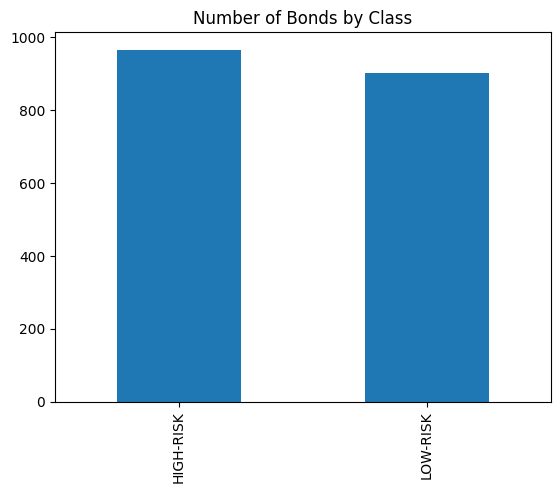

In [ ]:
# Construct binary ratings column from ratings (HY and IG)
ratings_df = ratings.to_frame()
conditions = [((ratings_df['RATING'] == "BB1") | (ratings_df['RATING'] == "BB2") |
     (ratings_df['RATING'] == "BB3")), ((ratings_df['RATING'] == "B1") |
     (ratings_df['RATING'] == "B2") | (ratings_df['RATING'] == "B3") |
     (ratings_df['RATING'] == "CCC1") | (ratings_df['RATING'] == "CCC2") |
     (ratings_df['RATING'] == "CCC3") | (ratings_df['RATING'] == "CC") |
     (ratings_df['RATING'] == "C"))]

# create a list of the values we want to assign for each condition
values = ['LOW-RISK', 'HIGH-RISK']

# create a new column and use np.select to assign values to it using our lists as arguments
ratings_df['Class'] = np.select(conditions, values)
ratings_df['Class'].value_counts().plot(kind='bar')
plt.title("Number of Bonds by Class")
plt.show()

In [ ]:
# Train-Test Split
X = scaled_df
y = ratings_df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Sub-Problem 1: Feature Importance (Sidharth)

Methods to Use
*   Logistic Regression with L1 Regularization (Lasso)
*   Random Forest Feature Importances
*   PCA (Principal Component Analysis)





In [ ]:
# Method 1: Lasso Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a Logistic Regression model with L1 regularization
logreg_model = LogisticRegression(penalty='l1', solver='liblinear')

# For tuning parameter C (lambda in other readings) use grid search to find optimal value
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Determine best C parameter
C_param = grid_search.best_params_
print("Best parameter: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameter:  {'C': 10}
Best cross-validation score: 0.84


In [ ]:
c_val = C_param["C"]
model = LogisticRegression(penalty='l1', solver='liblinear', C=c_val)

# Fit the model to your training data
model.fit(X_train, y_train)

# Retrieve the coefficients and corresponding feature names
coefficients = model.coef_[0]
feature_names = np.array(X.columns)

# Print the nonzero coefficients and their corresponding feature names
selected_features = feature_names[coefficients != 0]
print("Selected features:", selected_features)
print(len(selected_features))

Selected features: ['CURRENT_COUPON' 'MACAULAY_DUR' 'CONVEXITY' 'KDR_SWAP_6_MOS'
 'KDR_SWAP_2_YRS' 'KDR_SWAP_5_YRS' 'KDR_SWAP_20_YRS' 'EXCESS_RTN_3_MONTH'
 'EXCESS_RTN_6_MONTH' 'EXCESS_RTN_12_MONTH' 'EXCESS_RTN_YTD'
 'ASSETSWP_YTD_CHGE' 'PREVMEND_ACCRUED_INTEREST' 'LIBOROAS'
 'MARKET_CONVENTION_PRICE' 'FACE_VALUE_PREVMEND_LOC' 'TICKER_AAWW'
 'TICKER_ABG' 'TICKER_ACI' 'TICKER_ADAHEA' 'TICKER_ADT' 'TICKER_ADVGRO'
 'TICKER_AGKLN' 'TICKER_AHLMUN' 'TICKER_AMCX' 'TICKER_AMN' 'TICKER_ANF'
 'TICKER_APG' 'TICKER_AR' 'TICKER_ARI' 'TICKER_ARMK' 'TICKER_ARNC'
 'TICKER_ASCRES' 'TICKER_ASGN' 'TICKER_ASHWOO' 'TICKER_ATGE' 'TICKER_ATI'
 'TICKER_AXL' 'TICKER_BBCP' 'TICKER_BBDBCN' 'TICKER_BBWI' 'TICKER_BCO'
 'TICKER_BECN' 'TICKER_BIGSKY' 'TICKER_BLOCKC' 'TICKER_BLURAC'
 'TICKER_BMCAUS' 'TICKER_BRPCN' 'TICKER_BURLN' 'TICKER_BZH' 'TICKER_CABO'
 'TICKER_CAR' 'TICKER_CASAVI' 'TICKER_CASCN' 'TICKER_CC' 'TICKER_CCL'
 'TICKER_CCO' 'TICKER_CHDN' 'TICKER_CHK' 'TICKER_CHTR' 'TICKER_CITPET'
 'TICKER_CIVI' 'TICKER_

In [ ]:
# Update X_train, X_test with selected columns from logistic lasso regression
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [ ]:
# Method 2: Random Forest Feature Importances
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# For number of estimators and split criertion use grid search to find optimal values
param_grid = {'n_estimators': [100, 250, 500, 1000],
              'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Determine best parameter
params = grid_search.best_params_
print("Best parameter: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameter:  {'criterion': 'entropy', 'n_estimators': 500}
Best cross-validation score: 0.83


In [ ]:
# Fit Random Forest Model
n_trees = params['n_estimators']
criteria = params['criterion']

model = RandomForestClassifier(n_estimators = n_trees, criterion = criteria,
                               random_state=42)
model.fit(X_train, y_train)
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns,
                                      'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

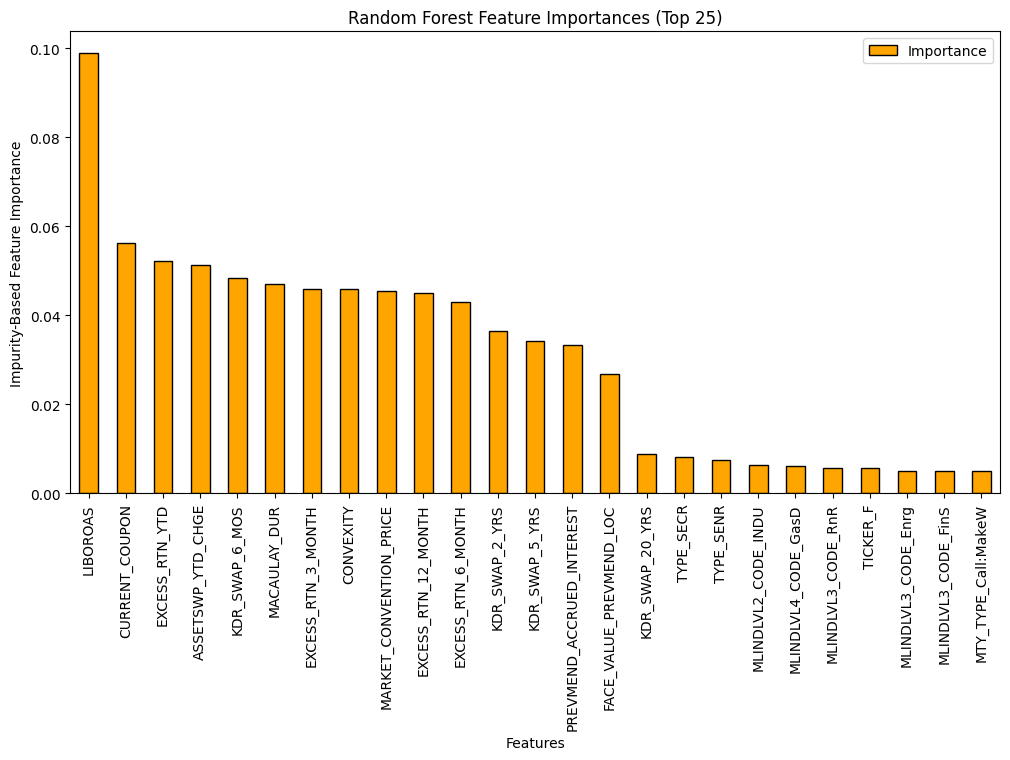

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot Feature Importances
top_features = feature_importance_df.head(25)
top_features.set_index("Feature", inplace=True)
top_features.plot(kind='bar', figsize=(12, 6), color='orange', edgecolor='black')
plt.title('Random Forest Feature Importances (Top 25)')
plt.xlabel('Features')
plt.ylabel('Impurity-Based Feature Importance')
plt.show()
plt.savefig("FeatImp.png")

In [ ]:
# Get top features and filter X_train and X_test with top features
best_features_df = top_features.head(15)
print((best_features_df["Importance"].sum()/top_features["Importance"].sum()))
print(best_features_df)
best_features = list(best_features_df.index)
X_train = X_train[best_features]
X_test = X_test[best_features]

0.9178456008109889
                           Importance
Feature                              
LIBOROAS                     0.098843
CURRENT_COUPON               0.056323
EXCESS_RTN_YTD               0.052217
ASSETSWP_YTD_CHGE            0.051351
KDR_SWAP_6_MOS               0.048456
MACAULAY_DUR                 0.046919
EXCESS_RTN_3_MONTH           0.045944
CONVEXITY                    0.045886
MARKET_CONVENTION_PRICE      0.045474
EXCESS_RTN_12_MONTH          0.045056
EXCESS_RTN_6_MONTH           0.043087
KDR_SWAP_2_YRS               0.036505
KDR_SWAP_5_YRS               0.034113
PREVMEND_ACCRUED_INTEREST    0.033417
FACE_VALUE_PREVMEND_LOC      0.026776


Main Problem: Classifying Bond Ratings using Basic and Advanced Models


*   Sidharth: KNN
*   Harshil: Naive Bayes, CART
*   Harshal: 2 Advanced
*   Sufayan: 2 Advanced





In [ ]:
# Model 1: KNN

# Use elbow method to determine optimal value of K using training data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

# Grid Search for weights parameter (uniform or by distance)
knn_model = KNeighborsClassifier()
param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': [1,2,3,4,5,6,7,8,9,10,15,20]}
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Determine best parameter
params = grid_search.best_params_
print("Best parameter: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



Best parameter:  {'n_neighbors': 10, 'weights': 'distance'}
Best cross-validation score: 0.77


Accuracy: 0.7482142857142857
[[204  91]
 [ 50 215]]
              precision    recall  f1-score   support

   HIGH-RISK       0.80      0.69      0.74       295
    LOW-RISK       0.70      0.81      0.75       265

    accuracy                           0.75       560
   macro avg       0.75      0.75      0.75       560
weighted avg       0.76      0.75      0.75       560



<Figure size 2000x2000 with 0 Axes>

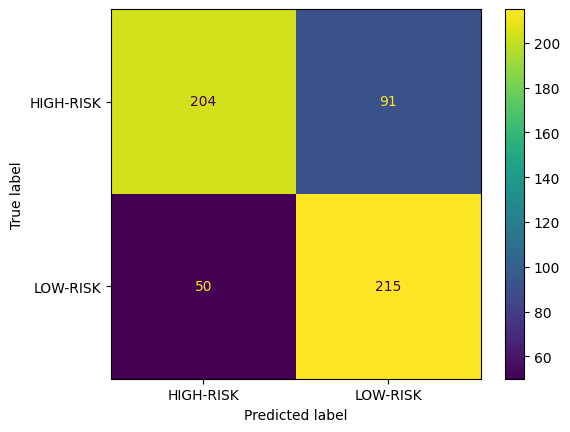

In [ ]:
# Build KNN Model Using Best Parameters
weights_param = params["weights"]
k_param = params["n_neighbors"]
knn_model = KNeighborsClassifier(n_neighbors = k_param, weights = weights_param)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Get Error metrics and classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
plt.figure(figsize=(20, 20))
disp.plot()
plt.show()

Accuracy: 0.6464285714285715
[[112 183]
 [ 15 250]]
              precision    recall  f1-score   support

   HIGH-RISK       0.88      0.38      0.53       295
    LOW-RISK       0.58      0.94      0.72       265

    accuracy                           0.65       560
   macro avg       0.73      0.66      0.62       560
weighted avg       0.74      0.65      0.62       560



<Figure size 2000x2000 with 0 Axes>

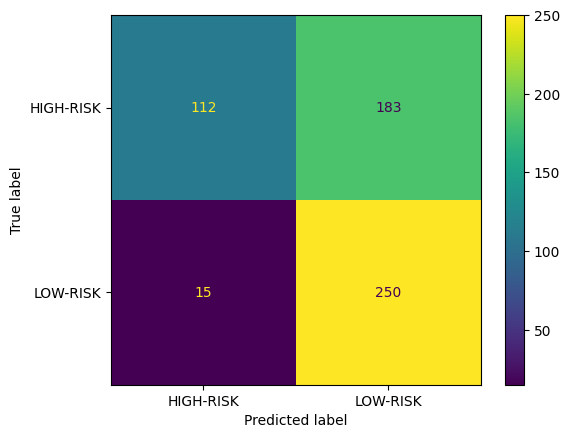

In [ ]:
# Model 2: Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Build Naive Bayes Model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)

# Get Error metrics and classification report and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
plt.figure(figsize=(20, 20))
disp.plot()
plt.show()


In [ ]:
#Model 3: CART Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameter Tuning:
decision_tree_model = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50]}
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters: ", best_params)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Build Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42, criterion=best_params['criterion'], max_depth=best_params['max_depth'])
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

Best parameters:  {'criterion': 'entropy', 'max_depth': 10}
Best cross-validation score: 0.76


Accuracy: 0.7607142857142857
[[232  63]
 [ 71 194]]
              precision    recall  f1-score   support

   HIGH-RISK       0.77      0.79      0.78       295
    LOW-RISK       0.75      0.73      0.74       265

    accuracy                           0.76       560
   macro avg       0.76      0.76      0.76       560
weighted avg       0.76      0.76      0.76       560



<Figure size 2000x2000 with 0 Axes>

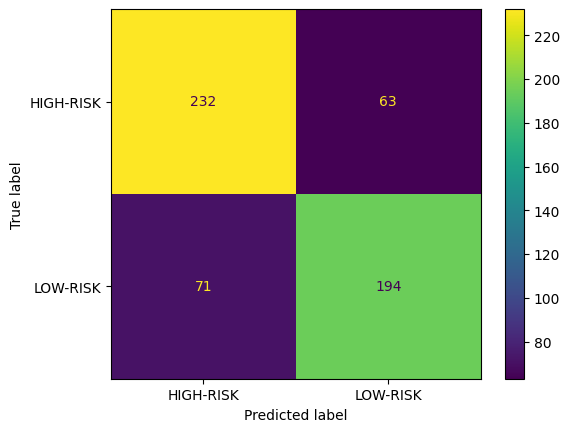

In [ ]:
# Get Error metrics and classification report and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
plt.figure(figsize=(20, 20))
disp.plot()
plt.show()

Best parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation score: 0.78
SVM Model Evaluation:
Accuracy: 0.7642857142857142
[[209  86]
 [ 46 219]]
              precision    recall  f1-score   support

   HIGH-RISK       0.82      0.71      0.76       295
    LOW-RISK       0.72      0.83      0.77       265

    accuracy                           0.76       560
   macro avg       0.77      0.77      0.76       560
weighted avg       0.77      0.76      0.76       560



<Figure size 2000x2000 with 0 Axes>

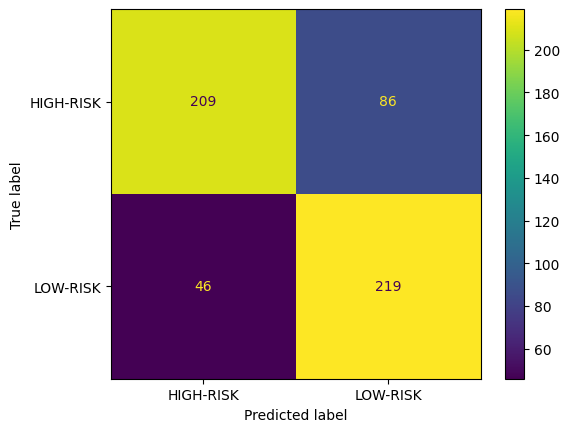

In [ ]:
# Model 4: SVM

# Import the SVM Classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Create the SVM model
svm_model = SVC(random_state=42)

# Parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100, 200],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly','sigmoid']
}

# Grid Search for the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Build SVM Model using the best parameters
svm_model = SVC(**best_params, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions with the model
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
plt.figure(figsize=(20, 20))
disp.plot()
plt.show()

Epoch 1/100
33/33 [==============================] - 1s 9ms/step - loss: 0.6111 - accuracy: 0.6801 - val_loss: 0.5535 - val_accuracy: 0.7356
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.5277 - accuracy: 0.7414 - val_loss: 0.5234 - val_accuracy: 0.7471
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.4925 - accuracy: 0.7711 - val_loss: 0.5081 - val_accuracy: 0.7395
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 0.4781 - accuracy: 0.7845 - val_loss: 0.5069 - val_accuracy: 0.7433
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.4652 - accuracy: 0.7807 - val_loss: 0.5023 - val_accuracy: 0.7395
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.4601 - accuracy: 0.7720 - val_loss: 0.5037 - val_accuracy: 0.7548
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 0.4598 - accuracy: 0.7826 - val_loss: 0.4987 - val_accuracy: 0.7548
Epoch 8/100
3

<Figure size 1000x1000 with 0 Axes>

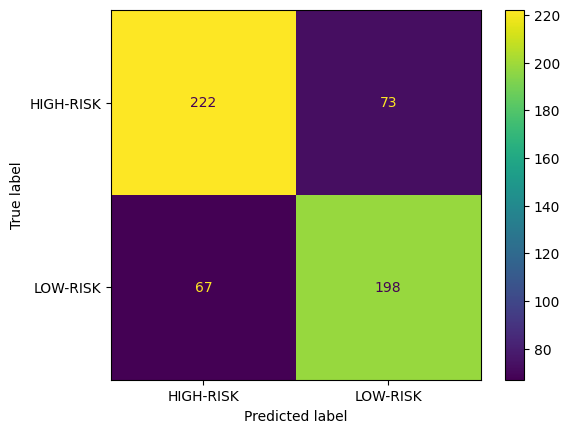

Neural Network Model Evaluation:
              precision    recall  f1-score   support

   HIGH-RISK       0.77      0.75      0.76       295
    LOW-RISK       0.73      0.75      0.74       265

    accuracy                           0.75       560
   macro avg       0.75      0.75      0.75       560
weighted avg       0.75      0.75      0.75       560



In [ ]:
# Model 5: Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Convert the labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Building the Neural Network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predicting the classes with the neural network
y_pred_nn = model.predict(X_test)
# Converting probabilities to class labels
y_pred_nn = np.argmax(y_pred_nn, axis=1)

# Computing the confusion matrix for the neural network
cm_nn = confusion_matrix(y_test_encoded, y_pred_nn)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=label_encoder.classes_)
plt.figure(figsize=(10, 10))
disp.plot()
plt.show()

# Print the classification report
print("Neural Network Model Evaluation:")
print(classification_report(y_test_encoded, y_pred_nn, target_names=label_encoder.classes_))


In [ ]:
# Model 6: XGBoost Classifier

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Convert the labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.15]
}



# Grid search for hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Best parameters and best score
best_params = grid_search.best_params_
print("Best parameters: ", best_params)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Build the model with best parameters
xgb_model = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train_encoded)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to original class labels
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluation
print("XGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print(confusion_matrix(y_test_encoded, y_pred_xgb))
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(figsize=(10, 10))
disp.plot()
plt.show()


In [ ]:
# Model 7: lightGBM

import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# Define the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Grid search for hyperparameters
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)


# Build the model with best parameters
lgb_model = lgb.LGBMClassifier(**best_params, random_state=42)
lgb_model.fit(X_train, y_train_encoded)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)

# Convert predictions back to original class labels
y_pred_lgb_labels = label_encoder.inverse_transform(y_pred_lgb)

# Best parameters and best score
best_params = grid_search.best_params_
print("Best parameters: ", best_params)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluation
print("LightGBM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_lgb))
print(confusion_matrix(y_test_encoded, y_pred_lgb))
print(classification_report(y_test_encoded, y_pred_lgb, target_names=label_encoder.classes_))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_lgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(figsize=(10, 10))
disp.plot()
plt.show()


In [ ]:
# Model 8: Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[("dt", decision_tree_model), ("knn", knn_model),
                ("svc", svm_model), ('gnb', naive_bayes_model)],
    voting="hard")
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_test)
# Evaluation
print("Voting Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
plt.figure(figsize=(20, 20))
disp.plot()
plt.show()

Sub-Problem 2: Clustering Bonds (TBD - based on methods learned in class on 11/21)
*   K-Means - Sidharth
*   Hierarchical - Harshil



In [ ]:
# Fit K-means clustering model with k = 2
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init='k-means++')
pred = kmeans.fit_predict(X_train)
comp_df = pd.DataFrame(zip(list(y_test), list(pred)), columns = ["Rating", "Cluster"])
cross_tab = pd.crosstab(comp_df['Rating'], comp_df['Cluster'])
print(cross_tab)
result = comp_df.groupby(['Cluster', 'Rating']).size().reset_index(name='Count')
sns.barplot(x='Cluster', y='Count', hue = "Rating", data=result)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Ratings by Cluster')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters = 2, linkage = 'single', metric = 'euclidean')
pred = hclust.fit_predict(X_train)
comp_df = pd.DataFrame(zip(list(y_test), list(pred)), columns = ["Rating", "Cluster"])
cross_tab = pd.crosstab(comp_df['Rating'], comp_df['Cluster'])
print(cross_tab)
result = comp_df.groupby(['Cluster', 'Rating']).size().reset_index(name='Count')
sns.barplot(x='Cluster', y='Count', hue = "Rating", data=result)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Ratings by Cluster')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We tried another Neural Network, this time with regularization and a different architecture. The model seemed to be performing better than before. The following code is the other model.

In [ ]:
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

#y_train.head()

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)



label_encoder = LabelEncoder()
y_train_numerical = label_encoder.fit_transform(y_train)
y_test_numerical = label_encoder.fit_transform(y_test)
mmodel =Sequential([


    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

    #layers.Dense(units=4, activation='relu', input_shape=(X_train.shape[1],)),
    #layers.Dense(units=3, activation='relu'),
    # the linear output layer
    #Dense(len(label_encoder.classes_), activation='softmax')


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train_numerical, epochs=100, batch_size=32, validation_data=(X_test, y_test_numerical), verbose=2)
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_numerical)
print('Test accuracy:', test_acc)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


import matplotlib.pyplot as plt


history = model.fit(X_train, y_train_numerical, epochs=50, batch_size=32, validation_data=(X_test, y_test_numerical), verbose=0)


matrix = confusion_matrix(y_test_encoded, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=label_encoder.classes_)
plt.figure(figsize=(10, 10))
disp.plot()
plt.show()


# Plot training and validation accuracy
#plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.title('Training and Validation Accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

# Plot training and validation loss
#plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.title('Training and Validation Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()


'''